# First let's talk about Machine Learning in general 
## not the same boring intro i swear T_T

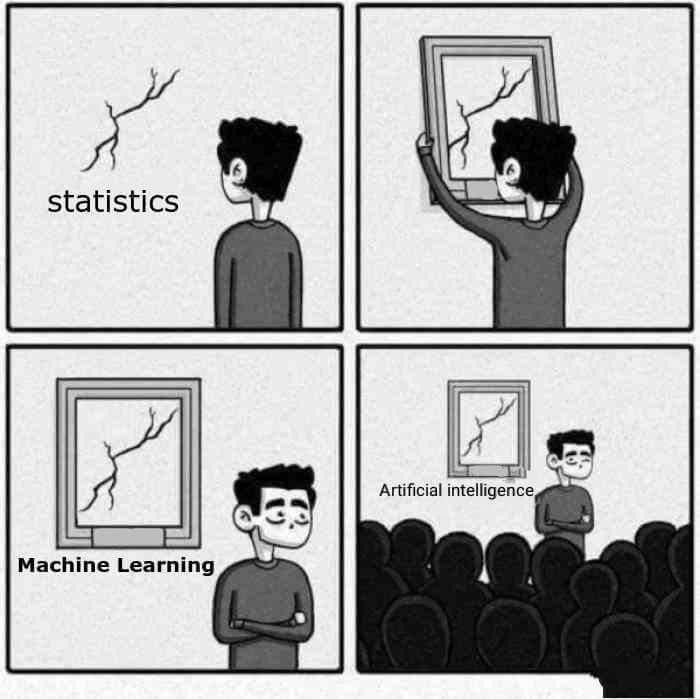

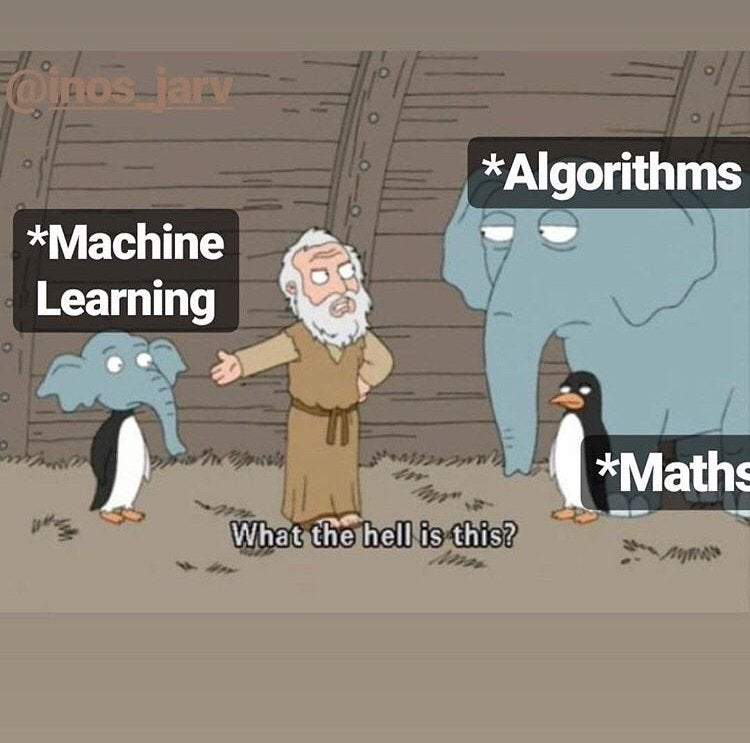

## This is the last meme i swear

# we have Data , Algorithm --> AI
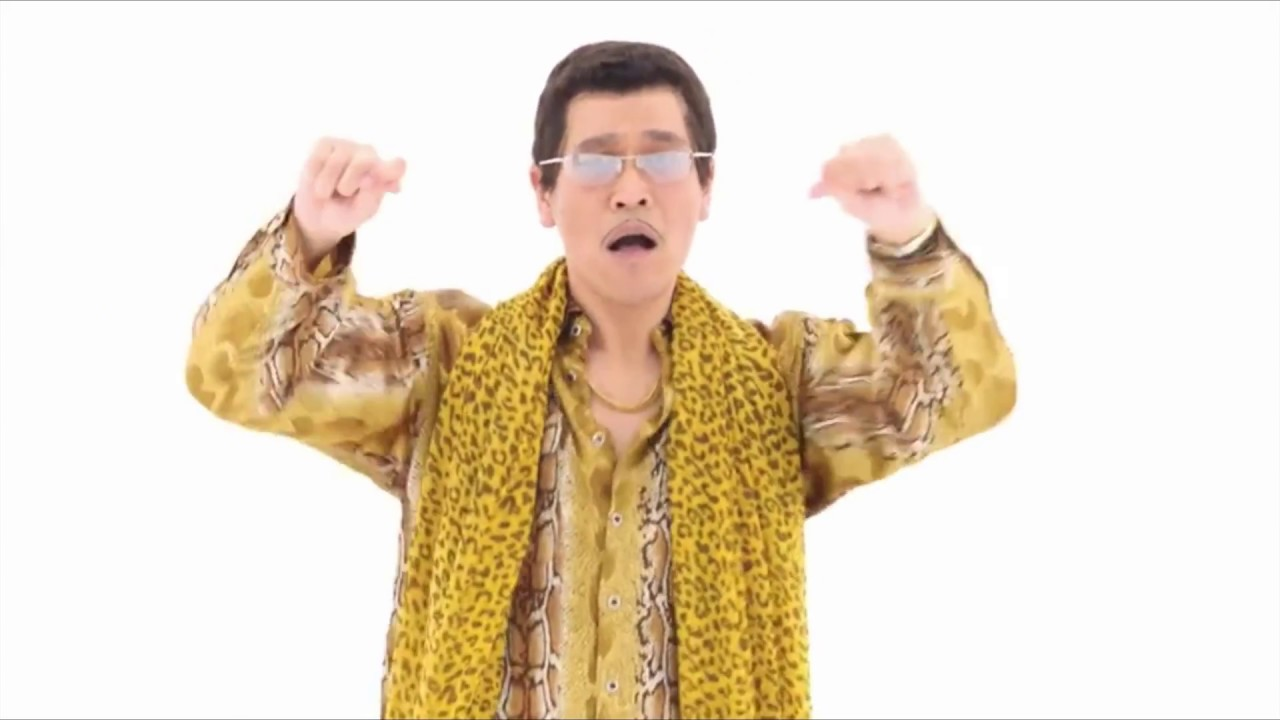

## So all we really need is Data and old algorithms?
## then why is it hard and new and growing?

- data wasn't that available before
- people were wasting the data by not using them or finding patterns in them
- it's so much helpful nowdays that we can simplify our life with such simple practice

## like what you might say?
- ads ?
- health care?
- agriculture?
- creating content?
- etc.? :v

## what problems can we solve with these algorithms?

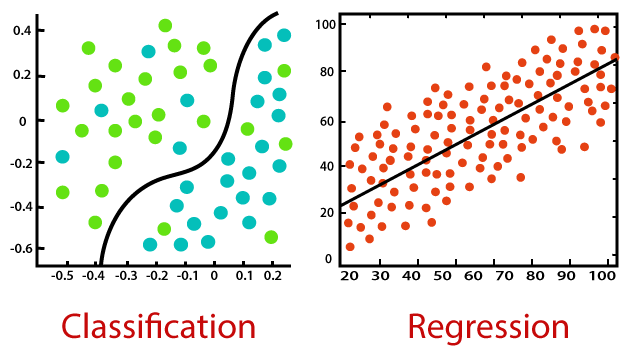

# Now let's dive into the boring part, CODING!

## first our regular boring libraries

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

## now a new challenger approches! 
## `sklearn` is your old but great friend and you will know why in a bit
### first let's create and visualize some data for more understanding

<IPython.core.display.Javascript object>


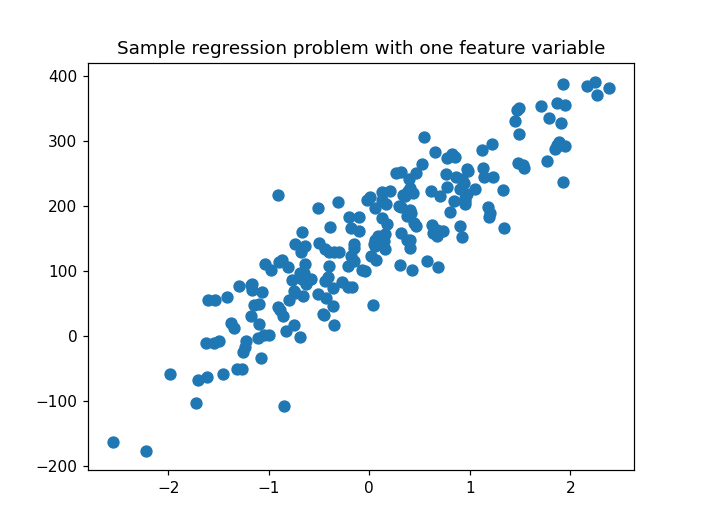

In [27]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression 
plt.figure() 
plt.title('Sample regression problem with one feature variable')
X_R1, y_R1 = make_regression( n_samples = 200 , n_features=1 ,  n_informative=1 , bias = 150.0 ,  noise = 50 , random_state=0 )
plt.scatter( X_R1 , y_R1, marker= 'o', s=50 )
plt.show()

## So what we want actually is to draw a line that we can predict any new value from

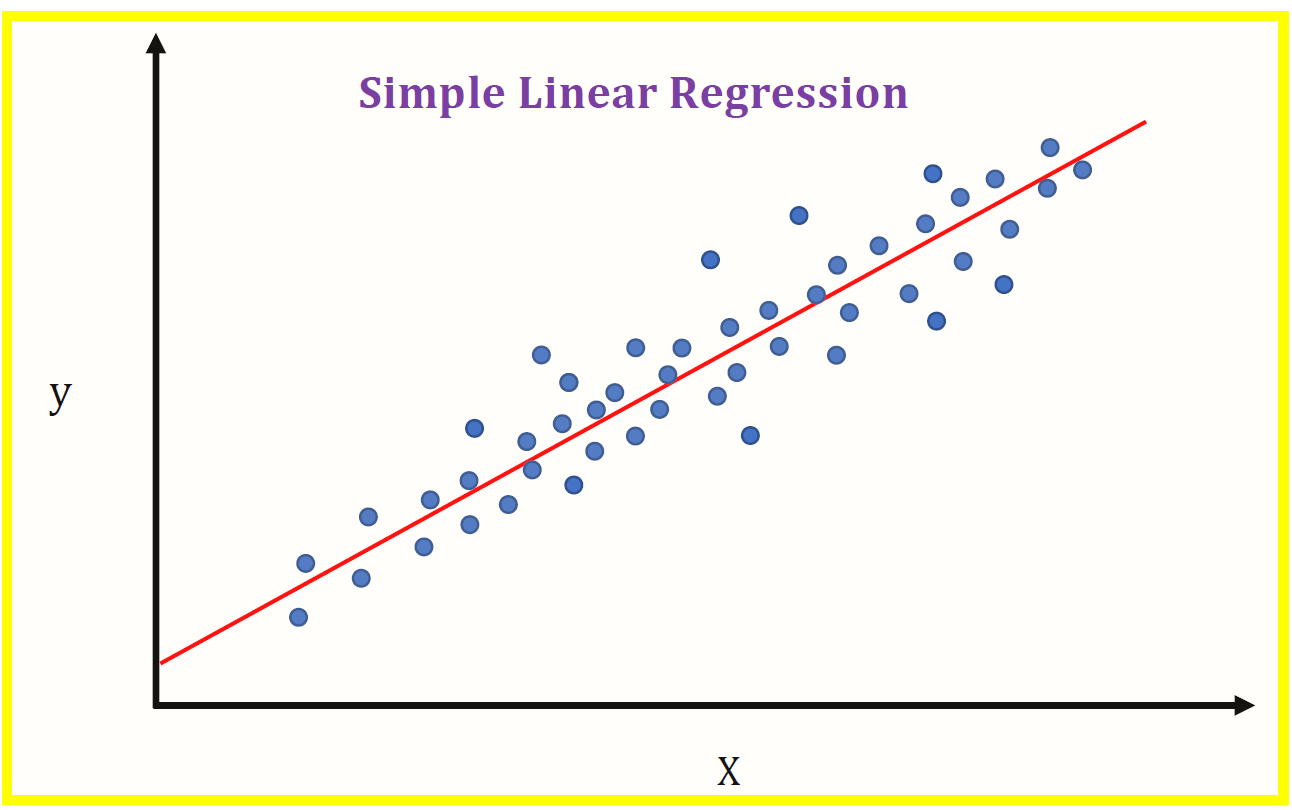

# How to use the `sklearn` models? 


## well first you need to split your data for training and testing
## and you can simply do this by using `train_test_split` function from `preprocessing` 

## why? let me explain
#### you can't train a model on data, then test the model on the same data
#### if the model fitted the data very well it doesn't mean it can predict new points correctly
#### that's why regular ml models are not that efficient, but they are a must.

## then to use any ML model you need to:
### 1- import your wanted model from sklearn
### 2- Create a model object like `model = your_chosen_model( your_parameters_if_needed)` 
### 3- Feed your data to the model // fit your model on the data 
### 4- Then you can evaluate the model using your test data created above 

# Let's dive into the first model we have 

#  k-nearest neighbors regressor

## Let's see it in action first

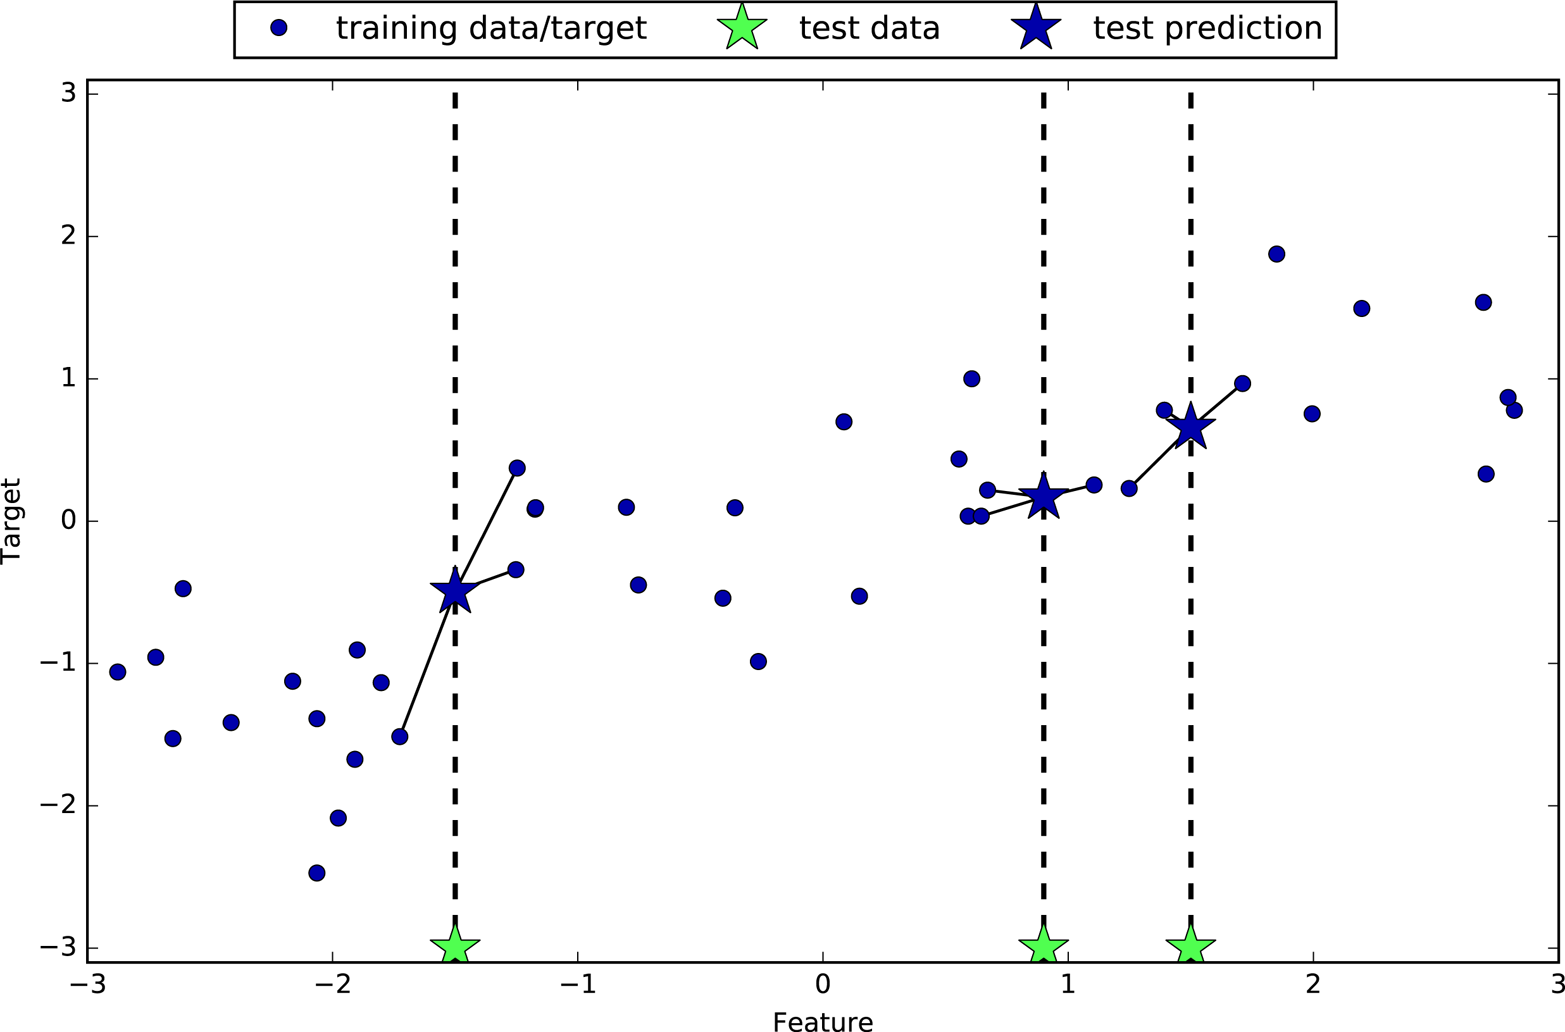

In [39]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import train_test_split 

X_train, X_test, y_train, y_test = train_test_split( X_R1 , y_R1 , random_state = 0 ) 

knnreg = KNeighborsRegressor(n_neighbors = 5) .fit(X_train, y_train)

print( knnreg.predict( X_test )[0] )
print( 'R-squared test score: {:.3f}' .format( knnreg.score( X_test , y_test ) ) ) 

98.44480175797895
R-squared test score: 0.751


<IPython.core.display.Javascript object>


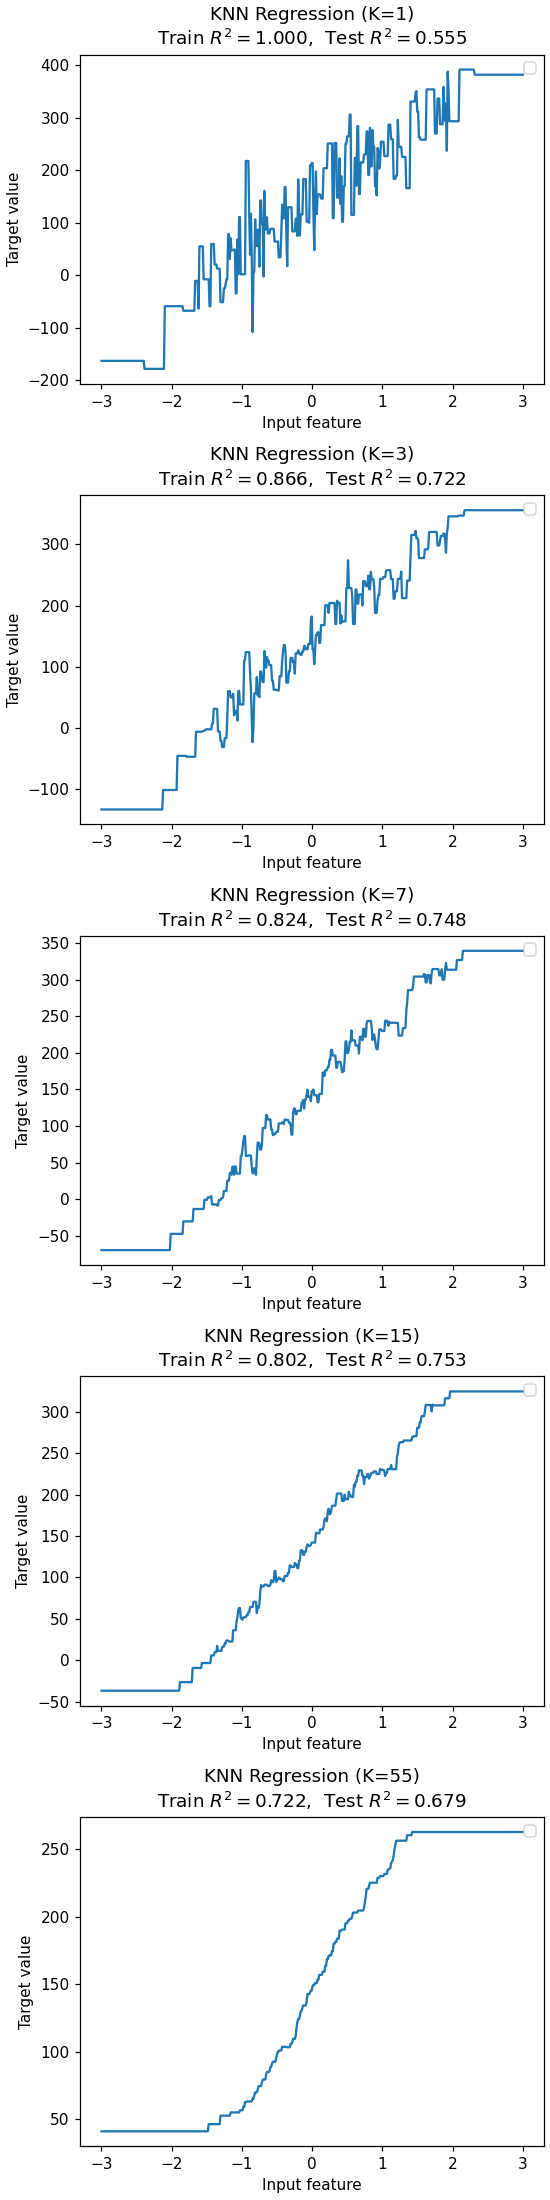

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [42]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split( X_R1 , y_R1 , random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    # Uncomment those 2 lines to see the values
   # thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    #thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


## Linear regression( WX+b )

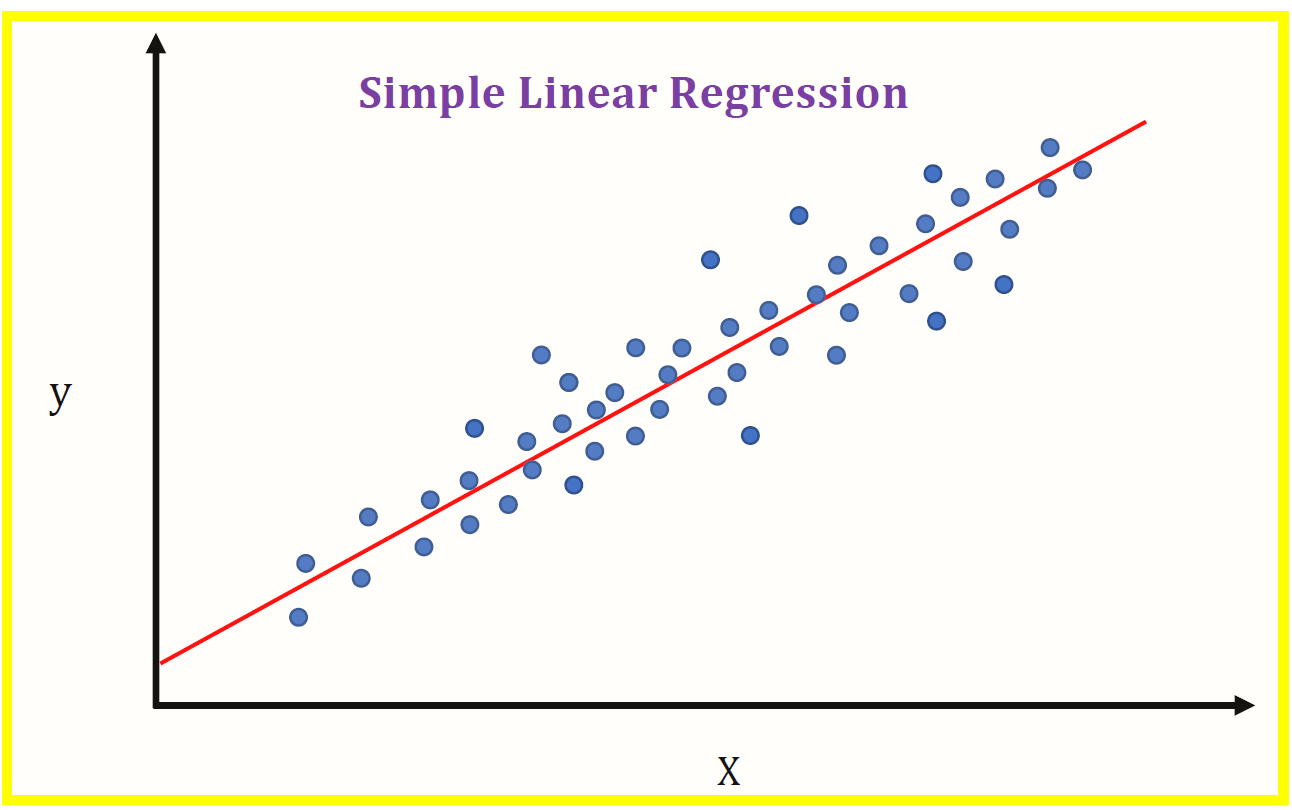

In [37]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}' .format( linreg.coef_ )) # Weights 
print('linear model intercept (b): {:.3f}'  .format( linreg.intercept_ ) ) # bias 
print('R-squared score (training): {:.3f}' .format( linreg.score( X_train , y_train) ) ) 
print('R-squared score (test): {:.3f}'  .format( linreg.score(X_test , y_test) ) ) 

linear model coeff (w): [98.27]
linear model intercept (b): 141.775
R-squared score (training): 0.813
R-squared score (test): 0.762


<IPython.core.display.Javascript object>


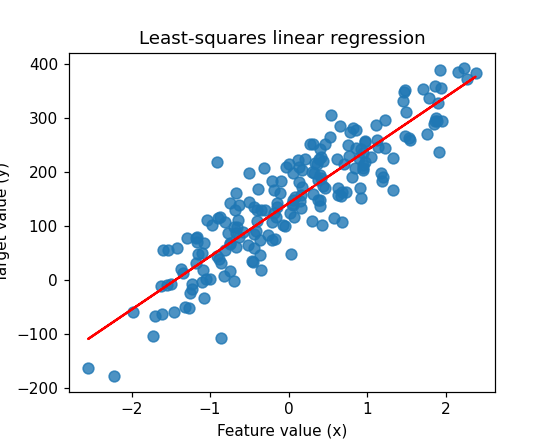

In [38]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

## Let's create a make sophisticated data with 7 features instead of 1, to use later

<IPython.core.display.Javascript object>


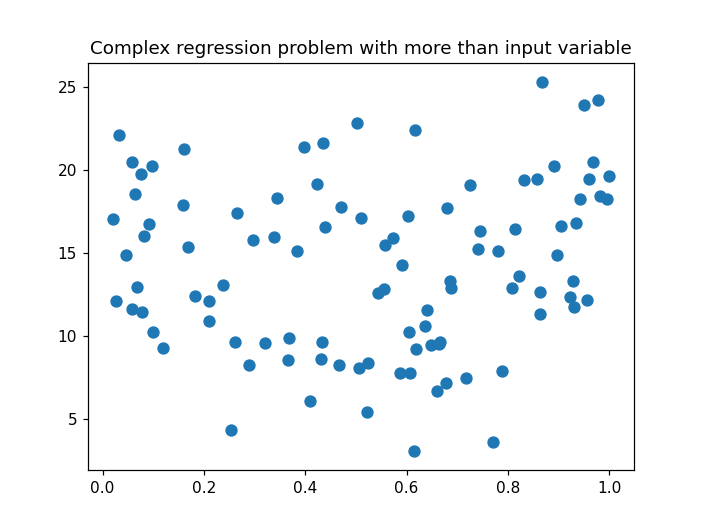

In [52]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with more than input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state=0)

plt.scatter( X_F1[:, 2] , y_F1, marker= 'o', s=50 )
plt.show()

# Let's upload some real data

In [71]:
def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    crime = pd.read_table('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
    crime = crime.iloc[:,columns_to_keep].dropna()

    X_crime = crime.iloc[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)

In [72]:
(X_crime, y_crime) = load_crime_dataset()

In [73]:
print( f' features Data {len(X_crime)}' )
print( f' Labels Data {len(y_crime)}' )

 features Data 1994
 labels Data 1994


In [74]:
# let's create a training and testing data  with 20% split
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,  random_state = 0)
# 80% - 20%

In [76]:
print( f' Training Data {len(X_train)}' )
print( f' Testing Data {len(X_test)}' )

 Training Data 1495
 Testing Data 499


## Let's play a little bit with models and see how they perform

In [43]:
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}\n'.format(linreg.coef_))
print('R-squared score (training): {:.3f}'.format( linreg.score(X_train, y_train)) )
print('R-squared score (test): {:.3f}' .format( linreg.score(X_test, y_test)) )

Crime dataset
linear model intercept: -1728.1306725989857
linear model coeff:
[ 1.62e-03 -9.43e+01  1.36e+01 -3.13e+01 -8.15e-02 -1.69e+01 -2.43e-03
  1.53e+00 -1.39e-02 -7.72e+00  2.28e+01 -5.66e+00  9.35e+00  2.07e-01
 -7.43e+00  9.66e-03  4.38e-03  4.80e-03 -4.46e+00 -1.61e+01  8.83e+00
 -5.07e-01 -1.42e+00  8.18e+00 -3.87e+00 -3.54e+00  4.49e+00  9.31e+00
  1.74e+02  1.18e+01  1.51e+02 -3.30e+02 -1.35e+02  6.95e-01 -2.38e+01
  2.77e+00  3.82e-01  4.39e+00 -1.06e+01 -4.92e-03  4.14e+01 -1.16e-03
  1.19e+00  1.75e+00 -3.68e+00  1.60e+00 -8.42e+00 -3.80e+01  4.74e+01
 -2.51e+01 -2.88e-01 -3.66e+01  1.90e+01 -4.53e+01  6.83e+02  1.04e+02
 -3.29e+02 -3.14e+01  2.74e+01  5.12e+00  6.92e+01  1.98e-02 -6.12e-01
  2.65e+01  1.01e+01 -1.59e+00  2.24e+00  7.38e+00 -3.14e+01 -9.78e-05
  5.02e-05 -3.48e-04 -2.50e-04 -5.27e-01 -5.17e-01 -4.10e-01  1.16e-01
  1.46e+00 -3.04e-01  2.44e+00 -3.66e+01  1.41e-01  2.89e-01  1.77e+01
  5.97e-01  1.98e+00 -1.36e-01 -1.85e+00]

R-squared score (training):

## let's see the effect of scalling on the performance of the model
### Remember the scalling part from DS?

In [79]:
from sklearn.preprocessing import MinMaxScaler
# min = 5 
# max = 10 
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform( X_train ) # --> fit x_train --> transform x_train

X_test_scaled = scaler.transform( X_test )  

linreg = LinearRegression().fit( X_train_scaled , y_train )

print('Crime dataset')
print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}\n'.format(linreg.coef_))
print('R-squared score (training): {:.3f}'.format( linreg.score(X_train_scaled, y_train)) )
print('R-squared score (test): {:.3f}' .format( linreg.score(X_test_scaled, y_test)) )



Crime dataset
linear model intercept: 195445140353698.2
linear model coeff:
[ 5.63e+03 -2.74e+02  6.36e+02 -1.88e+03 -1.29e+01 -7.89e+02 -8.46e+03
  1.53e+02 -1.57e+03 -4.34e+02  1.45e+02 -4.60e+02  6.27e+02  4.80e+00
 -3.11e+02  1.13e+03  2.53e+02  3.08e+03 -2.14e+02 -7.51e+02  5.94e+02
 -3.43e+01 -3.22e+01  4.89e+02 -1.81e+02 -1.86e+02  1.83e+02  5.20e+02
  2.78e+03  7.59e+02  3.04e+03 -5.37e+03 -2.89e+02  4.31e+01 -1.59e+03
  1.91e+02  2.50e+01  2.79e+02 -5.06e+02 -1.04e+03  1.00e+03 -1.55e+03
  7.63e+01  1.35e+02 -2.99e+02  1.41e+02 -1.11e+02 -7.55e+02  1.20e+03
 -8.18e+02 -2.72e+01 -1.33e+03  5.92e+02 -1.32e+03  1.87e+03  2.93e+02
 -1.04e+03 -2.36e+03  1.50e+03  4.72e+02  2.07e+02  1.63e+03 -3.80e+01
  1.99e+03  4.01e+02 -1.22e+02  1.07e+02  1.58e+02 -1.67e+02  1.66e+15
  2.29e+01 -1.59e+15  1.14e+15 -2.91e+15 -4.58e+02  2.64e+15 -2.59e+15
  1.18e+03 -5.97e+00  4.31e+01 -4.87e+02  6.63e+02  8.99e+02  1.07e+03
  5.03e+01  1.32e+02 -8.68e+00 -1.24e+02]

R-squared score (training): 0

## as you can see the scalling made the linear regression worse!
## why not try other tough models?

## Ridge model
### also a linear model, but it's more optimized and better overall
### provides a regularization parameter called alpha

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model coeff:\n{}\n'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum( linridge.coef_ != 0) )) # where coef not equal to 0 



Crime dataset
ridge regression linear model coeff:
[  88.69   16.49  -50.3   -82.91  -65.9    -2.28   87.74  150.95   18.88
  -31.06  -43.14 -189.44   -4.53  107.98  -76.53    2.86   34.95   90.14
   52.46  -62.11  115.02    2.67    6.94   -5.67 -101.55  -36.91   -8.71
   29.12  171.26   99.37   75.07  123.64   95.24 -330.61 -442.3  -284.5
 -258.37   17.66 -101.71  110.65  523.14   24.82    4.87  -30.47   -3.52
   50.58   10.85   18.28   44.11   58.34   67.09  -57.94  116.14   53.81
   49.02   -7.62   55.14  -52.09  123.39   77.13   45.5   184.91  -91.36
    1.08  234.09   10.39   94.72  167.92  -25.14   -1.18   14.6    36.77
   53.2   -78.86   -5.9    26.05  115.15   68.74   68.29   16.53  -97.91
  205.2    75.97   61.38  -79.83   67.27   95.67  -11.88]

R-squared score (training): 0.615
R-squared score (test): 0.599
Number of non-zero features: 88


## Lasso Model
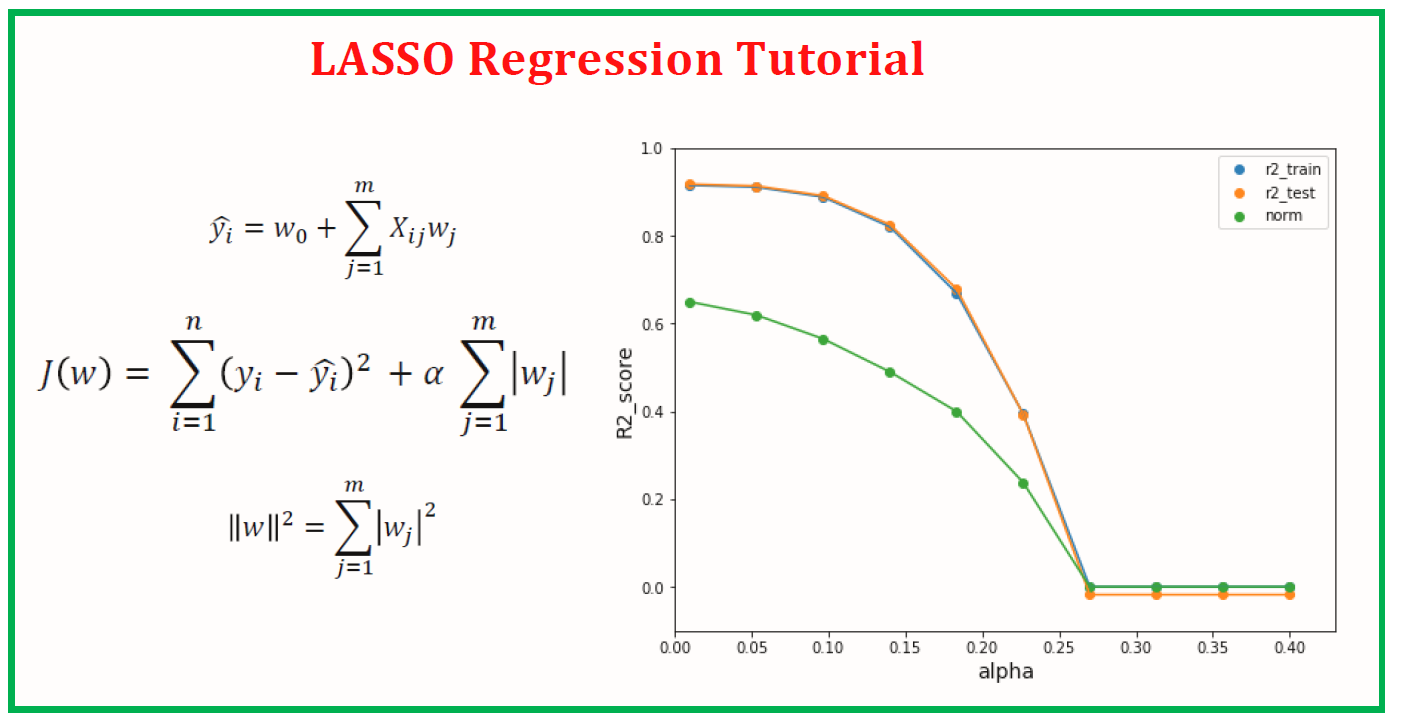

In [49]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# where alpha is a regularization parameter 
# and max_iter is the max number of iteration the model will take to calculate the params
linlasso = Lasso( alpha=2.0 , max_iter = 10000 ) .fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model coeff:\n{}\n'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

# sentax to printout the coeff params in a fine way
for e in sorted ( list( zip( list(X_crime) , linlasso.coef_ ) ) , key = lambda e: -abs(e[1]) ):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model coeff:
[    0.       0.      -0.    -168.18    -0.      -0.       0.     119.69
     0.      -0.       0.    -169.68    -0.       0.      -0.       0.
     0.       0.      -0.      -0.       0.      -0.       0.       0.
   -57.53    -0.      -0.       0.     259.33    -0.       0.       0.
     0.      -0.   -1188.74    -0.      -0.      -0.    -231.42     0.
  1488.37     0.      -0.      -0.      -0.       0.       0.       0.
     0.       0.      -0.       0.      20.14     0.       0.       0.
     0.       0.     339.04     0.       0.     459.54    -0.       0.
   122.69    -0.      91.41     0.      -0.       0.       0.      73.14
     0.      -0.       0.       0.      86.36     0.       0.       0.
  -104.57   264.93     0.      23.45   -49.39     0.       5.2      0.  ]

Non-zero features: 20
R-squared score (training): 0.631
R-squared score (test): 0.624

Features with non-zero weight (sorted by absolute magnitude):
	PctKidsBor

# let's see the effect of changing the alpha parameter

In [50]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, r-squared test: {:.2f}\n'  .format( alpha , np.sum(linlasso.coef_ != 0) , r2_train , r2_test ) )

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30



# now let's see the plynomial features effect
## AKA let's present our data X as X^2 or X^3 and so on

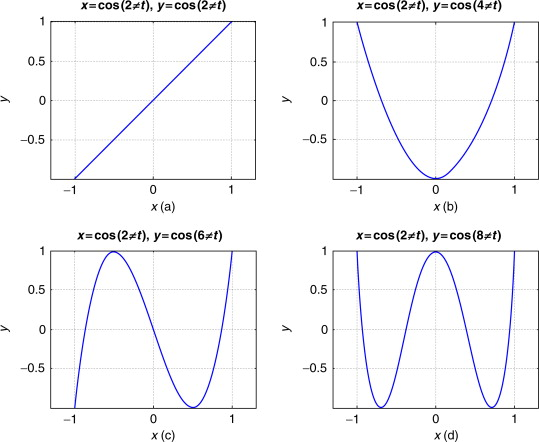

## first let's see how the model performs on data with one dimention 

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,  random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}\n'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 4.42  6.    0.53 10.24  6.55 -2.02 -0.32]

R-squared score (training): 0.722
R-squared score (test): 0.722


## Now we transform the original input data to add polynomial features up to degree 2 (quadratic)

In [57]:
poly = PolynomialFeatures( degree=2 )
X_F1_poly = poly.fit_transform( X_F1 )

X_train, X_test, y_train, y_test = train_test_split( X_F1_poly , y_F1,  random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}\n'
     .format(linreg.coef_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))


Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[ 3.41e-12  1.66e+01  2.67e+01 -2.21e+01  1.24e+01  6.93e+00  1.05e+00
  3.71e+00 -1.34e+01 -5.73e+00  1.62e+00  3.66e+00  5.05e+00 -1.46e+00
  1.95e+00 -1.51e+01  4.87e+00 -2.97e+00 -7.78e+00  5.15e+00 -4.65e+00
  1.84e+01 -2.22e+00  2.17e+00 -1.28e+00  1.88e+00  1.53e-01  5.62e-01
 -8.92e-01 -2.18e+00  1.38e+00 -4.90e+00 -2.24e+00  1.38e+00 -5.52e-01
 -1.09e+00]

(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805



## Addition of many polynomial features often leads to overfitting, 
## so we often use polynomial features in combination with regression that has a regularization penalty, like Ridge regression or Lasso

In [81]:
X_train, X_test, y_train, y_test = train_test_split( X_F1_poly , y_F1, random_state = 0)

linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}\n'
     .format(linreg.coef_))

print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

(poly deg 2 + ridge) linear model coeff (w):
[ 0.    2.23  4.73 -3.15  3.86  1.61 -0.77 -0.15 -1.75  1.6   1.37  2.52
  2.72  0.49 -1.94 -1.63  1.51  0.89  0.26  2.05 -1.93  3.62 -0.72  0.63
 -3.16  1.29  3.55  1.73  0.94 -0.51  1.7  -1.98  1.81 -0.22  2.88 -0.89]

(poly deg 2 + ridge) R-squared score (training): 0.826
(poly deg 2 + ridge) R-squared score (test): 0.825


## which as you can see gives better test score!

## Let's have a look on the BAAAAAASIC neural networks 

## without any details let's see how the NN work in action

<IPython.core.display.Javascript object>


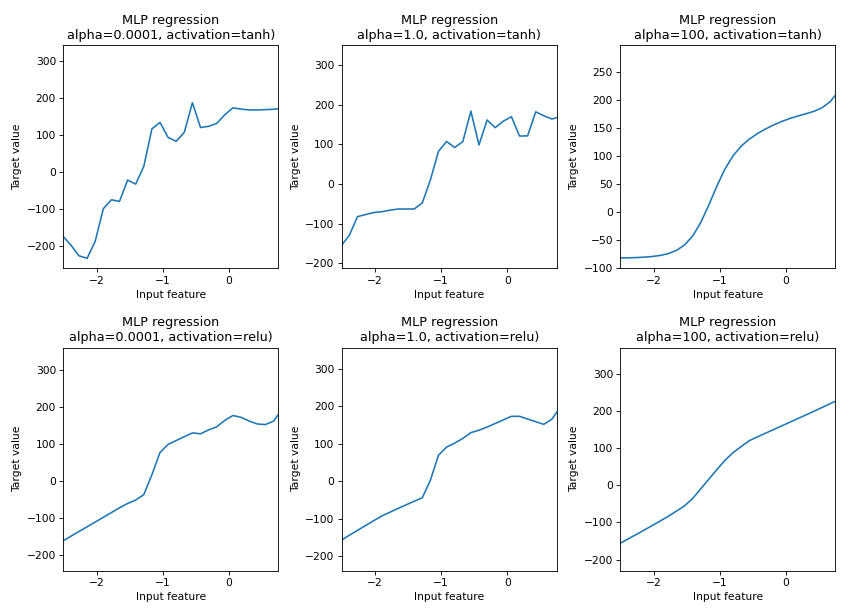

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

In [85]:
from sklearn.neural_network import MLPRegressor 

fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)

X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        
        
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100] ,   activation = thisactivation , alpha = thisalpha ,   solver = 'lbfgs')\
        .fit( X_train, y_train );
        
        y_predict_output = mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5, 0.75])
        # uncomment the next two lines to see the visualization better 
        thisaxis.plot(X_predict_input, y_predict_output)
        #thisaxis.plot(X_predict_input, y_predict_output ,  '^', markersize = 10)
        #thisaxis.plot(X_train, y_train, 'o')
    
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'  .format(thisalpha, thisactivation))
        plt.tight_layout()

## After seing how the alpha and activation parameters change the model, we chose the best one

In [97]:
mlpreg = MLPRegressor( hidden_layer_sizes = [100,100] ,   activation = 'tanh' , alpha = 50 ,   solver = 'lbfgs')\
        .fit( X_train, y_train )
print (f'Test Score : {mlpreg.score( X_test  , y_test )}')

Test Score : 0.2797820502987044


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [98]:
print (f'Train Score : {mlpreg.score( X_train  , y_train )}') 

Train Score : 0.9118941590726062


# And with that we end this session
## if you have any comments please leave them on the Live posts
## and your feedback is more than important to us, so don't be afraid to say your opinion

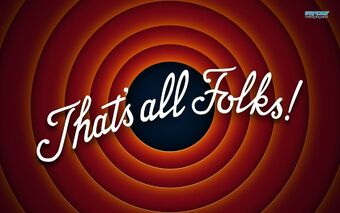